<a href="https://www.kaggle.com/code/ganeshgaikwad1/disaster-tweets?scriptVersionId=200747063" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

You can view the below helper_functions.py from this link :

'https://github.com/KenKaneki2207/Helper-Modules/blob/main/helper_functions.py#L78'

In [1]:
# Helper Functions
! wget 'https://raw.githubusercontent.com/KenKaneki2207/Helper-Modules/refs/heads/main/helper_functions.py'

import helper_functions as hp

--2024-10-13 07:47:03--  https://raw.githubusercontent.com/KenKaneki2207/Helper-Modules/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13943 (14K) [text/plain]
Saving to: 'helper_functions.py'

helper_functions.py 100%[===================>]  13.62K  --.-KB/s    in 0.001s  

2024-10-13 07:47:03 (19.5 MB/s) - 'helper_functions.py' saved [13943/13943]



# Data Loading and pre-processing

In [2]:
import pandas as pd

In [3]:
# load dataset
raw_datasets = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
raw_datasets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
raw_datasets.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

We just need the text and target coulumn to train our model

In [5]:
dataset = raw_datasets[['text', 'target']]
dataset

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [6]:
import re
def text_prep(text):
    
    text = text.lower()
    text = re.sub('[^a-z ]', '', text)
    return text

dataset.loc[3]['text'], text_prep(dataset.loc[3]['text'])

('13,000 people receive #wildfires evacuation orders in California ',
 ' people receive wildfires evacuation orders in california ')

In [7]:
dataset['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

## Balancing Dataset

 Non disaster tweets : 4342 tweets
 
 Disaster tweets : 3271 tweets
 
 We have to balance the dataset

In [8]:
df = raw_datasets[['text','target']]
df['text'] = df['text'].apply(text_prep)
df

/tmp/ipykernel_24/571692299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(text_prep)


,text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,people receive wildfires evacuation orders in...,1
4,just got sent this photo from ruby alaska as s...,1
...,...,...
7608,two giant cranes holding a bridge collapse int...,1
7609,ariaahrary thetawniest the out of control wild...,1
7610,m utckm s of volcano hawaii httptcozdtoydebj,1
7611,police investigating after an ebike collided w...,1


In [9]:
nd = df[df['target'] == 0]
nd

,text,target
15,whats up man,0
16,i love fruits,0
17,summer is lovely,0
18,my car is so fast,0
19,what a goooooooaaaaaal,0
...,...,...
7581,engineshed great atmosphere at the british lio...,0
7582,cramer igers words that wrecked disneys stock...,0
7584,these boxes are ready to explode exploding kit...,0
7587,sirens everywhere,0


In [10]:
nd['length'] = nd['text'].apply(len)
nd.sort_values('length', ascending=False)

/tmp/ipykernel_24/694712788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd['length'] = nd['text'].apply(len)


,text,target,length
5379,savs contact fell out but she was convinced it...,0,143
2301,nah but srsly b u demolish ur partners face am...,0,142
4233,is it possible to sneak into a hospital so i c...,0,140
4655,inundated with westeros between storm of sword...,0,139
5815,my parents are so impulsive sometimes i rememb...,0,139
...,...,...,...
1882,crushed,0,7
6705,thunder,0,7
28,cooool,0,7
30,the end,0,7


In [11]:
nd.sort_values('length', ascending=False)[:3271]

,text,target,length
5379,savs contact fell out but she was convinced it...,0,143
2301,nah but srsly b u demolish ur partners face am...,0,142
4233,is it possible to sneak into a hospital so i c...,0,140
4655,inundated with westeros between storm of sword...,0,139
5815,my parents are so impulsive sometimes i rememb...,0,139
...,...,...,...
2037,dont like those head first slides especially i...,0,62
282,julie r is the apocalypse version of romeo j...,0,62
2497,fotofill it looks so desolate end of the world...,0,61
3703,my biggest fear is disappointing the people wh...,0,61


In [12]:
new_nd = nd.sort_values('length', ascending=False)[:3271]
d = df[df['target'] == 1]
d['length'] = d['text'].apply(len)
d

/tmp/ipykernel_24/3717298644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['length'] = d['text'].apply(len)


,text,target,length
0,our deeds are the reason of this earthquake ma...,1,68
1,forest fire near la ronge sask canada,1,37
2,all residents asked to shelter in place are be...,1,130
3,people receive wildfires evacuation orders in...,1,58
4,just got sent this photo from ruby alaska as s...,1,86
...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,77
7609,ariaahrary thetawniest the out of control wild...,1,120
7610,m utckm s of volcano hawaii httptcozdtoydebj,1,45
7611,police investigating after an ebike collided w...,1,132


In [13]:
# Concate both n and nd dataframes
# nd --> Non disaster tweets,
# d  --> Disaster tweets

new_df = pd.concat([new_nd, d])
new_df

,text,target,length
5379,savs contact fell out but she was convinced it...,0,143
2301,nah but srsly b u demolish ur partners face am...,0,142
4233,is it possible to sneak into a hospital so i c...,0,140
4655,inundated with westeros between storm of sword...,0,139
5815,my parents are so impulsive sometimes i rememb...,0,139
...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,77
7609,ariaahrary thetawniest the out of control wild...,1,120
7610,m utckm s of volcano hawaii httptcozdtoydebj,1,45
7611,police investigating after an ebike collided w...,1,132


In [14]:
new_df['target'].value_counts()

target
0    3271
1    3271
Name: count, dtype: int64

# Split the dataset into training and testing

In [15]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(new_df['text'].to_numpy(),
                                                                              new_df['target'].to_numpy(),
                                                                              test_size=0.1,
                                                                              random_state=42)

len(train_sentences), len(train_labels), len(test_sentences), len(test_labels)

(5887, 5887, 655, 655)

In [16]:
# Lets visualize our splits

train_sentences[:5], train_labels[:5]

(array(['im a friggin wreck destiel sucks read the vine descriptionhttpstcomkxuxozt',
        'imagine a school where suicide bombing is being taught the teachers would say to the studentsplease pay httptcozfivvxydzy',
        'beyond stressed beyond hysteria into the grey misty indifference of complete shutdown of all but emergency services in my brain',
        'mass murderer che guevara greeting a woman in north korea httptcogljbnsfgll',
        'yahooschwab easy way to look good after the ray rice fiascothat blew up'],
       dtype=object),
 array([0, 1, 0, 1, 0]))

In [17]:
test_sentences[:5], test_labels[:5]

(array(['doing dialyses to my grandpa and oh lord this blood makes me light headed',
        'fb page of bushman safaris zimbabwe the company that palmer used  kill cecil is inundated with negative commentes httpstcoqwiihnmchr',
        'i presume my timeline will be inundated with soggy bottom amp lashings of moist tweets now d',
        'hungerarticles nepal rebuilding lives and livelihoods after quake devastation httptcolrouwjmbix',
        'fascinating pics from inside north korea not propaganda not devastation  just people living life httptcoedbcpwdu'],
       dtype=object),
 array([0, 0, 0, 1, 0]))

In [18]:
import random
sample = random.choice(train_sentences)
sample

'tomorrows going to be a year since i went to the panic concert dressed as afycso ryan do u guys remember that'

# Loading BERT Model

In [19]:
import tensorflow_text as text
import tensorflow as tf
import tensorflow_hub as hub

bert_prep_model = tf.saved_model.load('/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3')

# Create layer
bert_prep_layer = hub.KerasLayer(bert_prep_model, name='preprocessing')

In [20]:
# Test
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_prep_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
import kagglehub

# Download latest version
path = kagglehub.model_download("tensorflow/bert/tensorFlow2/bert-en-uncased-l-10-h-128-a-2")

print("Path to model files:", path)

Path to model files: /kaggle/input/bert/tensorflow2/bert-en-uncased-l-10-h-128-a-2/2


In [22]:
# Build encoding layer
bert_encoder_layer = hub.KerasLayer("/kaggle/input/bert/tensorflow2/bert-en-uncased-l-10-h-128-a-2/2",
                                  input_shape=[],
                                  dtype=tf.string,
                                  trainable=True,
                                  name="BERT")

In [23]:
bert_encoder_layer

In [24]:
bert_encoder_layer(bert_prep_model(['Hello!!']))

{'pooled_output': <tf.Tensor: shape=(1, 128), dtype=float32, numpy=
 array([[-9.8125249e-01,  9.5526081e-01, -4.1133843e-02, -9.6912396e-01,
         -9.9249732e-01, -7.6719582e-01,  1.6801739e-01,  1.1853279e-01,
          9.4765538e-01, -7.2901422e-01, -9.8332173e-01,  8.3255404e-01,
          8.0458504e-01,  9.9158609e-01,  1.1076629e-01,  8.4712189e-01,
         -9.9457735e-01, -2.9262844e-01, -9.8295569e-01,  9.4243616e-01,
         -5.7145160e-01, -9.4866377e-01, -5.9190381e-01,  9.2393595e-01,
         -3.9070490e-01,  8.0613464e-01, -9.3729985e-01, -9.7988528e-01,
         -2.8729385e-01, -6.2641251e-01,  9.7261280e-01,  8.6336148e-01,
          9.9630225e-01,  8.9147651e-01,  5.1769757e-01, -5.6234047e-02,
         -9.8146409e-01, -5.8333313e-01,  1.1245440e-01,  7.1866375e-01,
         -9.7560024e-01, -9.4811851e-01,  1.6967416e-01,  9.9913400e-01,
         -5.7853132e-01, -3.1865171e-01, -8.6616671e-01, -9.8316896e-01,
          9.3746161e-01,  9.9620360e-01, -7.2159559e-01,

# BERT Lite Model

In [25]:
from tensorflow.keras import layers

class bert_layers(layers.Layer):
#     @tf.function(jit_compile=True)
    def call(self, input):
        x = bert_prep_model(input)
        x = bert_encoder_layer(x)
        return x

In [26]:
# Build model
import tensorflow as tf

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    inputs = tf.keras.Input(shape=(), dtype=tf.string)
    x = bert_layers()(inputs)
    x = x['pooled_output']
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)

    # - Output layer
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model_1 = tf.keras.Model(inputs, outputs, name='model_1_bert')

    # Compile model
    model_1.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_1 = model_1.fit(train_sentences,
                       train_labels,
                       validation_data=(test_sentences, test_labels),
                       epochs=5)

Epoch 1/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.6387 - loss: 0.6259 - val_accuracy: 0.7896 - val_loss: 0.5041
Epoch 2/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.7223 - loss: 0.5423 - val_accuracy: 0.7226 - val_loss: 0.5676
Epoch 3/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.7354 - loss: 0.5379 - val_accuracy: 0.7896 - val_loss: 0.4932
Epoch 4/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.7530 - loss: 0.5137 - val_accuracy: 0.7774 - val_loss: 0.4881
Epoch 5/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.7535 - loss: 0.5092 - val_accuracy: 0.7134 - val_loss: 0.5522


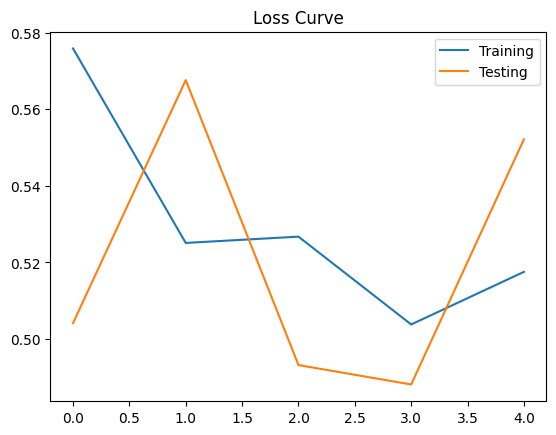

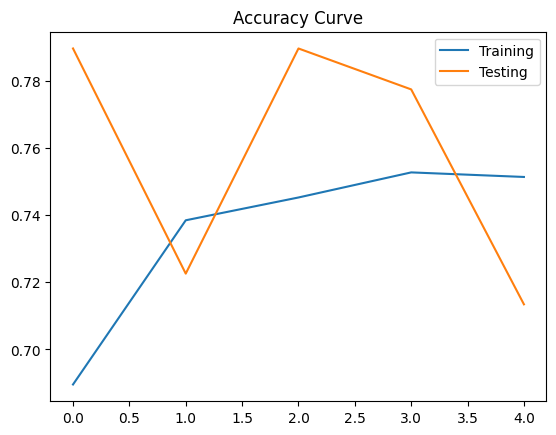

In [27]:
hp.plot_history(history_1)

# CNN Model

Features :
* CNN layer
* Text vectorization
* Embedding layer

In [28]:
from tensorflow.keras.layers import TextVectorization

text_vector = TextVectorization(
    max_tokens=200,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    output_mode='int',
    output_sequence_length=20,
)

In [29]:
text_vector.adapt(train_sentences)

In [30]:
sample,text_vector(sample)

('tomorrows going to be a year since i went to the panic concert dressed as afycso ryan do u guys remember that',
 <tf.Tensor: shape=(20,), dtype=int64, numpy=
 array([  1, 113,   5,  21,   3, 155,   1,   8,   1,   5,   2,   1,   1,
          1,  25,   1,   1,  69, 166,   1])>)

In [31]:
from tensorflow.keras.layers import Embedding

embed_layer = Embedding(
    input_dim=200,
    output_dim=20,
)

In [32]:
import tensorflow as tf
from tensorflow.keras import layers

model_2 = tf.keras.Sequential([
    layers.Input(shape=(), dtype=tf.string),
    text_vector,
    embed_layer,   
    layers.Conv1D(15, 3, activation='relu'),
    layers.MaxPooling1D(),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_2 = model_2.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(test_sentences, test_labels),
)

Epoch 1/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5772 - loss: 0.6801 - val_accuracy: 0.6412 - val_loss: 0.6208
Epoch 2/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6747 - loss: 0.6002 - val_accuracy: 0.7298 - val_loss: 0.5598
Epoch 3/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7096 - loss: 0.5513 - val_accuracy: 0.7389 - val_loss: 0.5412
Epoch 4/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7315 - loss: 0.5226 - val_accuracy: 0.7389 - val_loss: 0.5279
Epoch 5/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7375 - loss: 0.5127 - val_accuracy: 0.7542 - val_loss: 0.5213


In [33]:
type(test_sentences[:5].tolist())

list

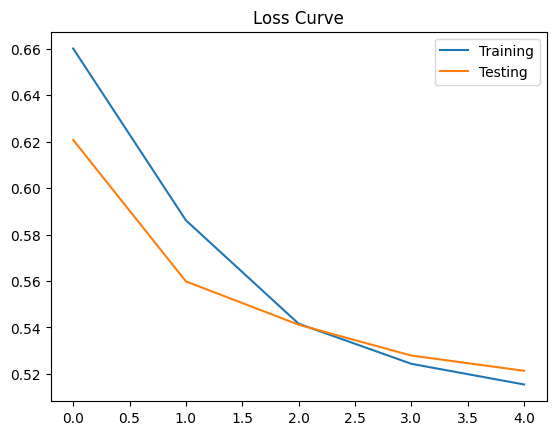

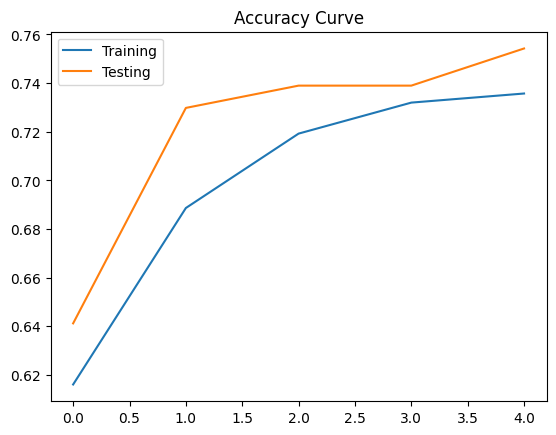

In [34]:
hp.plot_history(history_2)

# Universal Sentence Encoder Model

In [35]:
import kagglehub
path = kagglehub.model_download("google/universal-sentence-encoder/tensorFlow2/universal-sentence-encoder")

In [36]:
import tensorflow_hub as hub
import tensorflow as tf

use = hub.KerasLayer('/kaggle/input/universal-sentence-encoder/tensorflow2/universal-sentence-encoder/2',
                    trainable=False,
                    input_shape=[],
                    dtype=tf.string
                    )
use

In [37]:
from tensorflow.keras import layers

class use_layer(layers.Layer):
    def call(self, input):
        x = use(input)
        return x

In [38]:
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    inputs = layers.Input(shape=(), dtype=tf.string)
    x = use_layer()(inputs)
    x = layers.Dense(100, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model_use = tf.keras.Model(inputs, outputs)

    model_use.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [39]:
history_use = model_use.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(test_sentences, test_labels),
)

Epoch 1/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.7161 - loss: 0.6019 - val_accuracy: 0.8079 - val_loss: 0.4461
Epoch 2/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8090 - loss: 0.4200 - val_accuracy: 0.7774 - val_loss: 0.4434
Epoch 3/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8114 - loss: 0.4036 - val_accuracy: 0.7988 - val_loss: 0.4312
Epoch 4/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8257 - loss: 0.3891 - val_accuracy: 0.7988 - val_loss: 0.4188
Epoch 5/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8195 - loss: 0.4049 - val_accuracy: 0.7957 - val_loss: 0.4252


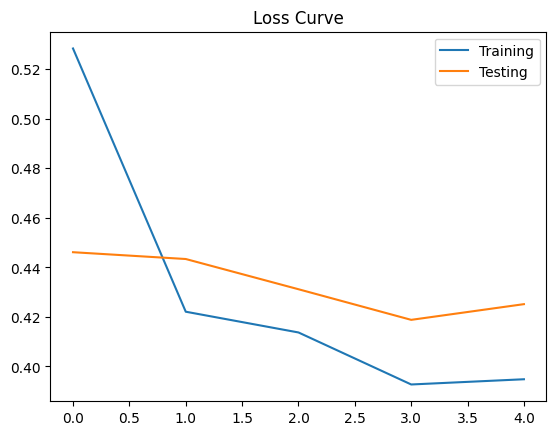

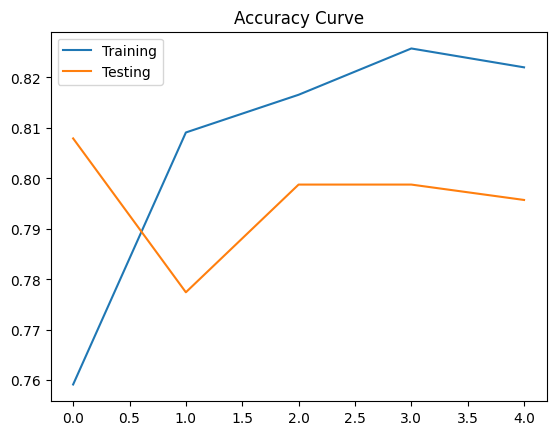

In [40]:
hp.plot_history(history_use)

In [41]:
use_preds = tf.round(model_use.predict(test_sentences))

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


In [42]:
test_sentences.shape, test_labels.shape, use_preds.shape

((655,), (655,), TensorShape([655, 1]))

In [43]:
use_predictions = pd.DataFrame({'sentences':test_sentences, 
                                'true_labels':test_labels, 
                                'predicted_labels':tf.squeeze(use_preds)})
use_predictions

,sentences,true_labels,predicted_labels
0,doing dialyses to my grandpa and oh lord this ...,0,0.0
1,fb page of bushman safaris zimbabwe the compan...,0,1.0
2,i presume my timeline will be inundated with s...,0,0.0
3,hungerarticles nepal rebuilding lives and live...,1,1.0
4,fascinating pics from inside north korea not p...,0,1.0
...,...,...,...
650,i entered to win the entire set of butterlondo...,0,0.0
651,last time i checked lots of injuries over the ...,0,0.0
652,wesleylowery how are you going to survive thi...,1,1.0
653,hires doppler showing storm just ne of edmond ...,1,1.0


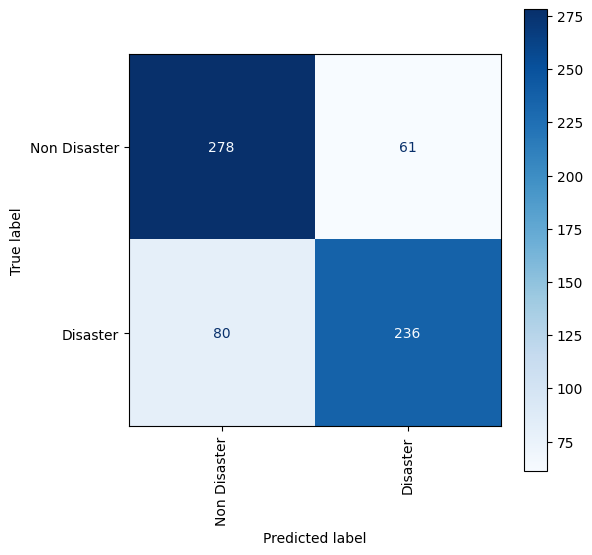

<Figure size 1000x700 with 0 Axes>

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def confusionmatrix(true, preds):
    
    cm = confusion_matrix(true, preds)
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.figure(figsize=(10, 7))
    ConfusionMatrixDisplay(cm, display_labels=['Non Disaster','Disaster']).plot(cmap='Blues', ax=ax, xticks_rotation='vertical')
    
    plt.show()
    
confusionmatrix(test_labels, use_preds)

In [45]:
wrong_preds10 = use_predictions[(use_predictions['true_labels'] == 1) & (use_predictions['true_labels'] != use_predictions['predicted_labels'])]

In [46]:
wrong_preds10.sample()

,sentences,true_labels,predicted_labels
282,blakeshelton dont be a fart in a windstormfoll...,1,0.0


In [47]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("punkt")

stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
def text_prep(text):
    text = text.lower()
    text = re.sub(r'#\w+', '', text)
    words = text.split()
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

text_prep('hy my name is ganesh. Your #instabuddy. I love running in the wood in the full night')

'hy name ganesh. . love running wood full night'

# Training USE on Preprocessed data

In [49]:
new_df['text'] = new_df['text'].apply(text_prep)
new_df

,text,target,length
5379,savs contact fell convinced didnt amp went gua...,0,143
2301,nah srsly b u demolish ur partners face ampsta...,0,142
4233,possible sneak hospital stab hazardous needle ...,0,140
4655,inundated westeros storm swords book tape amp ...,0,139
5815,parents impulsive sometimes remember coming ho...,0,139
...,...,...,...
7608,two giant cranes holding bridge collapse nearb...,1,77
7609,ariaahrary thetawniest control wild fires cali...,1,120
7610,utckm volcano hawaii httptcozdtoydebj,1,45
7611,police investigating ebike collided car little...,1,132


In [50]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(new_df['text'].to_numpy(),
                                                                              new_df['target'].to_numpy(),
                                                                              test_size=0.1,
                                                                              random_state=42)

len(train_sentences), len(train_labels), len(test_sentences), len(test_labels)

(5887, 5887, 655, 655)

In [51]:
history_use_2 = model_use.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(test_sentences, test_labels),
)

Epoch 1/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8040 - loss: 0.4200 - val_accuracy: 0.8262 - val_loss: 0.4235
Epoch 2/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8270 - loss: 0.4003 - val_accuracy: 0.7927 - val_loss: 0.4506
Epoch 3/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8265 - loss: 0.3968 - val_accuracy: 0.8293 - val_loss: 0.4236
Epoch 4/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8224 - loss: 0.3930 - val_accuracy: 0.8232 - val_loss: 0.4233
Epoch 5/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8289 - loss: 0.3934 - val_accuracy: 0.8049 - val_loss: 0.4392


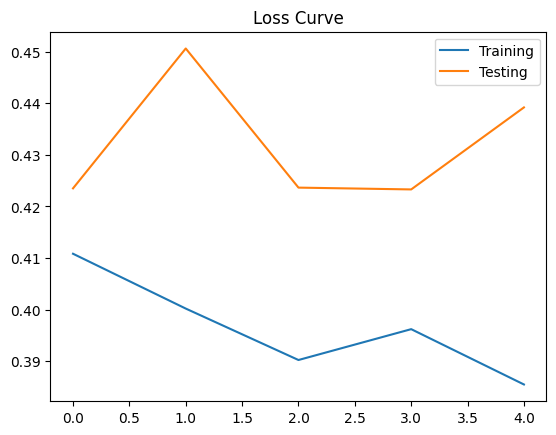

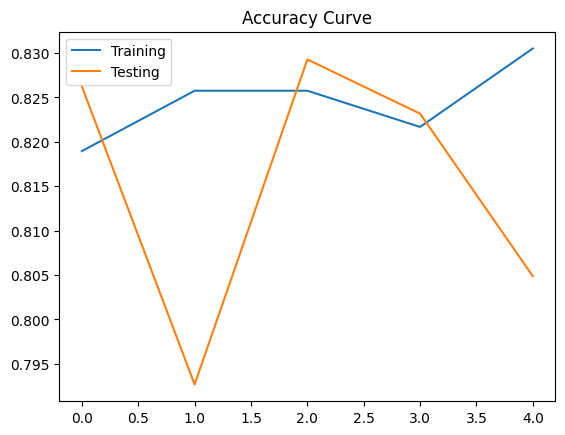

In [52]:
hp.plot_history(history_use_2)

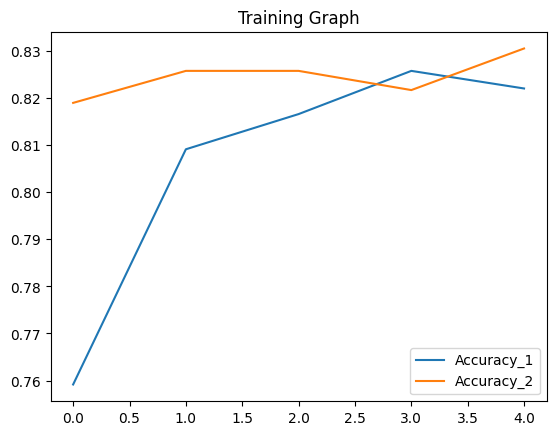

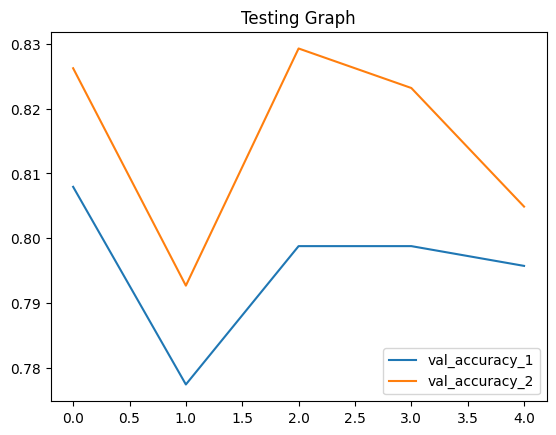

In [53]:
def compare_history(history_1, history_2):
    acc_1 = history_1.history['accuracy']
    acc_2 = history_2.history['accuracy']
    
    val_acc_1 = history_1.history['val_accuracy']
    val_acc_2 = history_2.history['val_accuracy']
    
    plt.title('Training Graph')
    plt.plot(acc_1, label='Accuracy_1' )
    plt.plot(acc_2, label='Accuracy_2' )
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.title('Testing Graph')
    plt.plot(val_acc_1, label='val_accuracy_1' )
    plt.plot(val_acc_2, label='val_accuracy_2' )
    plt.legend()
    plt.show()
    
compare_history(history_use, history_use_2)

# Submission

In [54]:
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [55]:
submission_text = test_df[['id','text']]
submission_text

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [56]:
preds = model_use.predict(submission_text['text'].to_numpy())
preds[:5]

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


array([[0.834113  ],
       [0.9512408 ],
       [0.88752645],
       [0.99202275],
       [0.9935795 ]], dtype=float32)

In [57]:
preds = tf.round(preds)
preds[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [58]:
submission_csv = pd.DataFrame({'id':submission_text['id'], 'target':tf.squeeze(preds)})
submission_csv

,id,target
0,0,1.0
1,2,1.0
2,3,1.0
3,9,1.0
4,11,1.0
...,...,...
3258,10861,1.0
3259,10865,1.0
3260,10868,1.0
3261,10874,0.0


In [59]:
submission_csv.to_csv('submission.csv')